# Prognosis of cardiovascular diseases
## (with 400k adults 2020)

##### Data Visualization in Tableau Public:
https://public.tableau.com/app/profile/anton8444/viz/ThehealthstatusofAmericans2020/Dashboard1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data preprocessing

#### Load dataset:
https://www.cdc.gov/brfss/index.html

In [2]:
data = pd.read_sas('2020.XPT')

/Users/tonyd/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sas/sas_xport.py:475: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[x] = v


In [3]:
df = data.copy()

#### Read documentation: 
https://www.cdc.gov/brfss/annual_data/2020/pdf/codebook20_llcp-v2-508.pdf
#### and select features that are useful for simple incidence screening and have few data gaps.

In [4]:
df=df[['_SEX',     # Sex of Respondent  (Male = 1).
       '_AGE80',    # Age in years.
       '_BMI5',     # Body Mass Index (BMI).
       '_TOTINDA',  # Adults who reported doing physical activity or exercise during the past 30 days other than their regular job (Yes = 1).
       'GENHLTH',   # Self-reported health. Would you say that in general your health is: (1-9).
       'SLEPTIM1',  # Hours of sleep. How Much Time Do You Sleep/ On average, how many hours of sleep do you get in a 24-hour period (in hours)? 
       'CVDSTRK3',  # Stroke Status. (Ever told) (you had) a stroke?(Yes = 1).
       'DIABETE4',  # Diabetes Status. (Ever told) (you had) diabetes? (Yes = 1). 
       'LASTDEN4',  # Last Visited Dentist or Dental Clinic (1-4, 1 = anytime less than 12 months ago).
       'RMVTETH4',  # Number of Permanent Teeth Removed.
       'MARITAL',   # Marital status (1 Married,2 Divorced,3 Widowed, 4 Separated, 5 Never married, 6 unmarried couple ).
       '_EDUCAG',   # Education Status. What is the highest grade or year of school you completed? 
       '_CHLDCNT',  # Number of Children in Household. 
       '_SMOKER3',  # Four-level smoker status: Everyday smoker, Someday smoker, Former smoker, Non-smoker.
       '_RFBING5',  # Binge drinkers (males having five or more drinks on one occasion, females having four or more drinks on one occasion) (Yes = 2).
       '_URBSTAT',  # Urban/Rural Status (1 = Urban).
       '_IMPRACE',  # Imputed race/ethnicity value (1 White,2 Black, 3 Asian, 4 American Indian/Alaskan Native, 5 Hispanic, Other race).
       '_MICHD']]   # Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI) (Yes = 1)


In [5]:
df.dtypes

_SEX        float64
_AGE80      float64
_BMI5       float64
_TOTINDA    float64
GENHLTH     float64
SLEPTIM1    float64
CVDSTRK3    float64
DIABETE4    float64
LASTDEN4    float64
RMVTETH4    float64
MARITAL     float64
_EDUCAG     float64
_CHLDCNT    float64
_SMOKER3    float64
_RFBING5    float64
_URBSTAT    float64
_IMPRACE    float64
_MICHD      float64
dtype: object

### Check for NaN

In [6]:
df.isnull().sum()

_SEX            0
_AGE80          0
_BMI5       41357
_TOTINDA        0
GENHLTH         8
SLEPTIM1        3
CVDSTRK3        3
DIABETE4        6
LASTDEN4        7
RMVTETH4        7
MARITAL        12
_EDUCAG         0
_CHLDCNT        0
_SMOKER3        0
_RFBING5        0
_URBSTAT     7127
_IMPRACE        0
_MICHD       3571
dtype: int64

### Descry each feature

#### '_MICHD'
##### Reported having coronary heart disease or myocardial infarction. Predicted feature for model.

In [7]:
df.groupby(['_MICHD'])['_MICHD'].count()

_MICHD
1.0     34163
2.0    364224
Name: _MICHD, dtype: int64

##### Make the values '1' for 'Yes' and '0' for 'No'.

In [8]:
df=df.replace({'_MICHD':{2:0}})

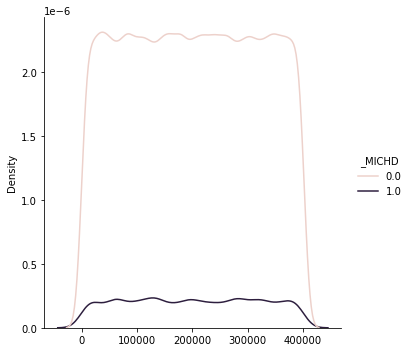

In [9]:
sns.displot(x=df.index, hue='_MICHD',  data=df, kind='kde');

In [10]:
df['_MICHD'].isnull().sum()

3571

##### This is the target feature it has 3571 NaN values and class imbalance.

#### '_SEX'

In [11]:
df.groupby(['_SEX'])['_SEX'].count()

_SEX
1.0    183931
2.0    218027
Name: _SEX, dtype: int64

##### Make the values '1' for 'men'.

In [12]:
df=df.replace({'_SEX':{2:0}})
df.groupby(['_SEX'])['_SEX'].count()

_SEX
0.0    218027
1.0    183931
Name: _SEX, dtype: int64

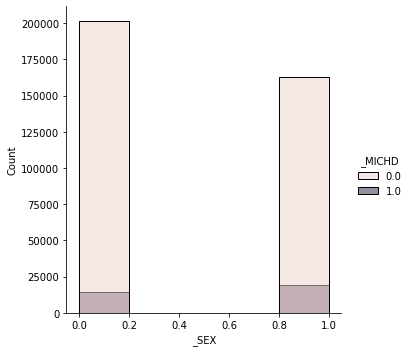

In [13]:
sns.displot(x = df['_SEX'], hue = '_MICHD', data = df,  binwidth = 0.2)

#### '_AGE80' 
##### Age in years.

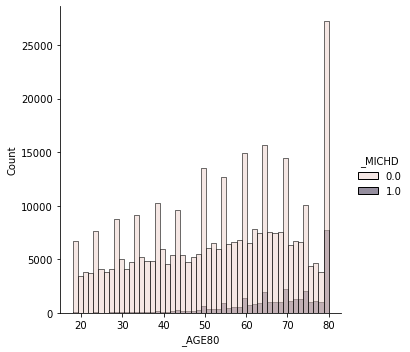

In [14]:
sns.displot(x = df['_AGE80'], hue = '_MICHD', data = df,  bins = 50)

##### The distribution is not normal, but since the latter category includes all people over 80 years of age, and age affects the risk of disease, leave the values unchanged for now.

#### '_BMI5'
##### Body Mass Index.

In [15]:
df['_BMI5'].isnull().sum()

41357

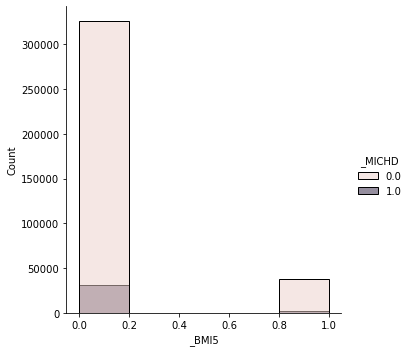

In [16]:
sns.displot(x = df['_BMI5'].isnull(), hue = '_MICHD', data = df,  bins = 5)  # show NaN distribution

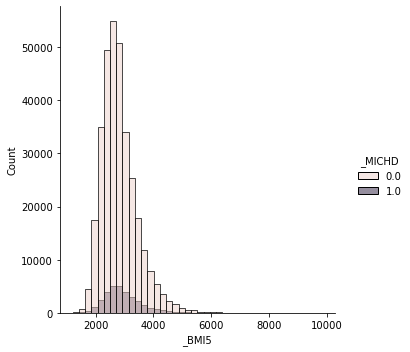

In [17]:
sns.displot(x = df['_BMI5'].round(0), hue = '_MICHD', data = df,  bins = 40)

In [18]:
df['_BMI5'].describe()

count    360601.000000
mean       2830.631271
std         638.164868
min        1202.000000
25%        2399.000000
50%        2732.000000
75%        3138.000000
max        9843.000000
Name: _BMI5, dtype: float64

##### '_BMI5' has 41357 NaN values and extreme high and low values, replace NaN with the median and take the logarithm.

In [19]:
df['_BMI5'].fillna((df['_BMI5'].median()), inplace=True)

In [20]:
df['BMI_LOG'] = np.log(df['_BMI5'])

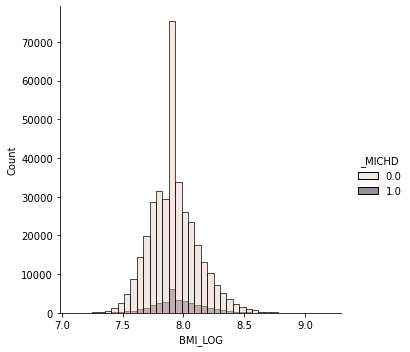

In [21]:
sns.displot(x = df['BMI_LOG'], hue = '_MICHD', data = df,  bins = 40)

In [22]:
df['BMI_LOG'].describe()

count    401958.000000
mean          7.923940
std           0.200013
min           7.091742
25%           7.798523
50%           7.912789
75%           8.034307
max           9.194516
Name: BMI_LOG, dtype: float64

In [23]:
df=df.drop(['_BMI5'], axis=1)

#### '_TOTINDA'
##### Adults who reported doing physical activity.

In [24]:
df.groupby(['_TOTINDA'])['_TOTINDA'].count()

_TOTINDA
1.0    305883
2.0     95393
9.0       682
Name: _TOTINDA, dtype: int64

##### Make the values '1' or '0' and remove the missing value (encoded '9').

In [25]:
df=df.replace({'_TOTINDA':{2:0}})
df=df.drop(df[df['_TOTINDA'] ==9].index)

In [26]:
df.groupby(['_TOTINDA'])['_TOTINDA'].count()

_TOTINDA
0.0     95393
1.0    305883
Name: _TOTINDA, dtype: int64

#### 'GENHLTH'
##### Self-reported health from '1' to '5'.

In [27]:
df.groupby(['GENHLTH'])['GENHLTH'].count()

GENHLTH
1.0     81579
2.0    137999
3.0    119272
4.0     46111
5.0     15390
7.0       640
9.0       280
Name: GENHLTH, dtype: int64

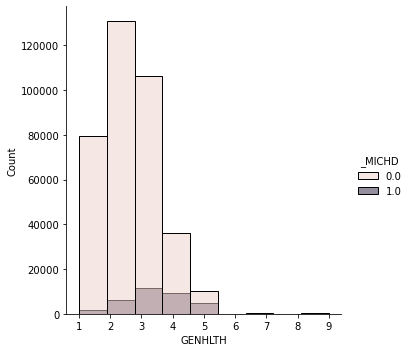

In [28]:
sns.displot(x = df['GENHLTH'], hue = '_MICHD', data = df,  bins = 9)

##### Remove the missing values (encoded '7' & '9').

In [29]:
df = df.drop(df[df['GENHLTH'] == 7].index)
df = df.drop(df[df['GENHLTH'] == 9].index)
df.groupby(['GENHLTH'])['GENHLTH'].count()

GENHLTH
1.0     81579
2.0    137999
3.0    119272
4.0     46111
5.0     15390
Name: GENHLTH, dtype: int64

#### 'SLEPTIM1'
##### Hours of sleep.

In [30]:
df.groupby(['SLEPTIM1'])['SLEPTIM1'].count()

SLEPTIM1
1.0        758
2.0       1092
3.0       2659
4.0       9920
5.0      24320
6.0      82331
7.0     118528
8.0     121836
9.0      19763
10.0      9921
11.0       589
12.0      2844
13.0       139
14.0       307
15.0       255
16.0       303
17.0        26
18.0       139
19.0         6
20.0        90
21.0         2
22.0        13
23.0         9
24.0        53
77.0      3954
99.0       499
Name: SLEPTIM1, dtype: int64

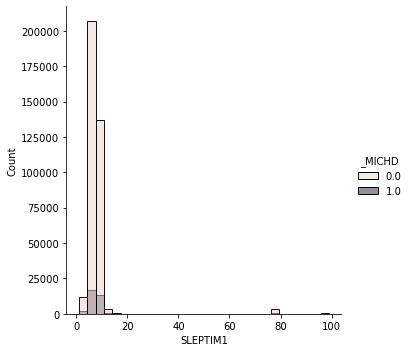

In [31]:
sns.displot(x = df['SLEPTIM1'], hue = '_MICHD', data = df,  bins = 30)

##### "SLEPTIM1" has 4,5k NaN values (encoded '77' & '99') and extreme high and low values (1 & 24 hours of sleep), replace NaN with the median value take the logarithm.

In [32]:
median_sleeptime = df['SLEPTIM1'].median()
df = df.replace({'SLEPTIM1':{77:median_sleeptime, 99:median_sleeptime}})
df['SLEEP_LOG'] = np.log(df['SLEPTIM1'])

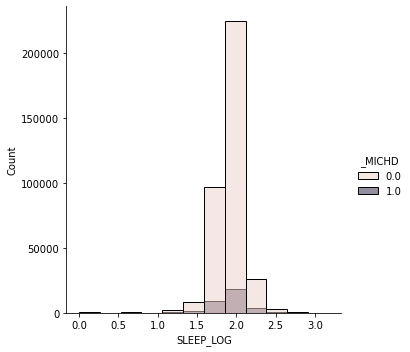

In [33]:
sns.displot(x = df['SLEEP_LOG'], hue = '_MICHD', data = df,  bins = 12)

In [34]:
df = df.drop(['SLEPTIM1'], axis=1)

#### 'CVDSTRK3'
##### Ever Diagnosed with a Stroke.

In [35]:
df.groupby(['CVDSTRK3'])['CVDSTRK3'].count()

CVDSTRK3
1.0     15537
2.0    383705
7.0       869
9.0       245
Name: CVDSTRK3, dtype: int64

##### Missed values (encoded '7' & '9') in order not to lose the rest of values replace not confirmed values with '0'.

In [36]:
df.loc[df['CVDSTRK3'] != 1, 'CVDSTRK3'] = 0
df.groupby(['CVDSTRK3'])['CVDSTRK3'].count()

CVDSTRK3
0.0    384819
1.0     15537
Name: CVDSTRK3, dtype: int64

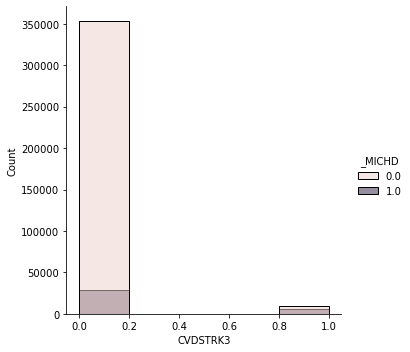

In [37]:
sns.displot(x = df['CVDSTRK3'], hue = '_MICHD', data = df,  bins = 5)

#### 'DIABETE4'
##### Ever Diagnosed with a Diabetes.

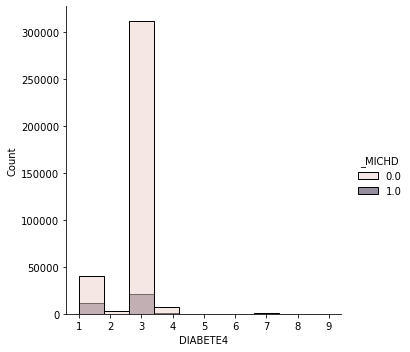

In [38]:
sns.displot(x = df['DIABETE4'], hue = '_MICHD', data = df,  bins = 10)

In [39]:
df.groupby(['DIABETE4'])['DIABETE4'].count()

DIABETE4
1.0     51808
2.0      3359
3.0    335866
4.0      8574
7.0       479
9.0       267
Name: DIABETE4, dtype: int64

'7' & '9' - missed and NaN values, '2' -  female Diabetes only during pregnancy, '3' - No, '4' - No, pre-diabetes or borderline diabetes, in order not to lose the rest of values replace all values with '0'.

In [40]:
df.loc[df['DIABETE4'] != 1, 'DIABETE4'] = 0
df.groupby(['DIABETE4'])['DIABETE4'].count()

DIABETE4
0.0    348548
1.0     51808
Name: DIABETE4, dtype: int64

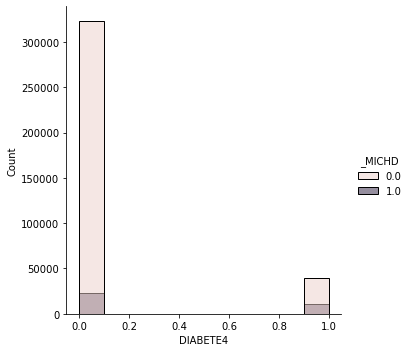

In [41]:
sns.displot(x = df['DIABETE4'], hue = '_MICHD', data = df,  bins = 10)

#### 'LASTDEN4'
##### Last Visited Dentist or Dental Clinic.

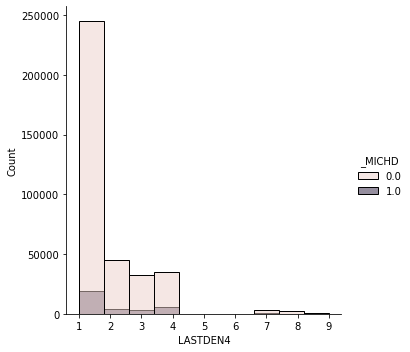

In [42]:
sns.displot(x = df['LASTDEN4'], hue = '_MICHD', data = df,   bins = 10)

In [43]:
df.groupby(['LASTDEN4'])['LASTDEN4'].count()

LASTDEN4
1.0    266287
2.0     49497
3.0     36255
4.0     41575
7.0      4075
8.0      2239
9.0       424
Name: LASTDEN4, dtype: int64

##### There is a relationship between the values: the higher the value, the less often the respondent visited the dentist. "9" - missed, delete these rows.

In [44]:
df = df.drop(df[df['LASTDEN4'] == 9].index)

#### 'RMVTETH4'
##### Number of Permanent Teeth Removed.

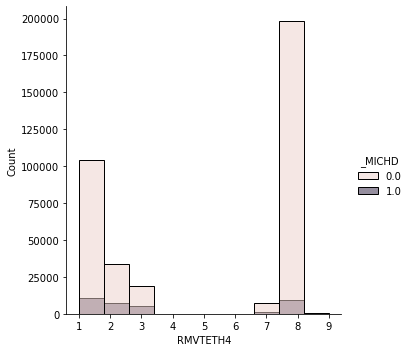

In [45]:
sns.displot(x = df['RMVTETH4'], hue = '_MICHD', data = df,   bins = 10)

In [46]:
df.groupby(['RMVTETH4'])['RMVTETH4'].count()

RMVTETH4
1.0    115845
2.0     41614
3.0     24498
7.0      8684
8.0    208507
9.0       780
Name: RMVTETH4, dtype: int64

##### Lots of missing values ('8') given the uniform distribution of the remaining values. Remove this feature.

In [47]:
df = df.drop(['RMVTETH4'], axis=1)

#### 'MARITAL'
##### Marital status ('1' Married, '2' Divorced, '3' Widowed, '4' Separated, '5' Never married, '6' unmarried couple ).

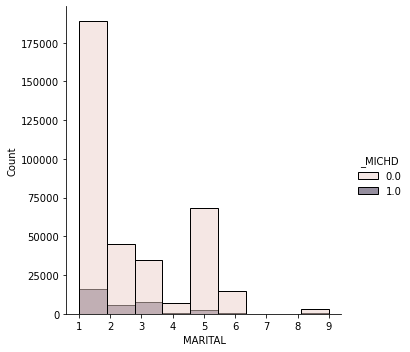

In [48]:
sns.displot(x = df['MARITAL'], hue = '_MICHD', data = df,   bins = 9)

In [49]:
df.groupby(['MARITAL'])['MARITAL'].count()

MARITAL
1.0    206614
2.0     51614
3.0     43294
4.0      7916
5.0     71691
6.0     15199
9.0      3595
Name: MARITAL, dtype: int64

##### Given that this is categorical data and some categories (widowers) has a pronounced dependence: do One Hot Encoding. Remove missing values ('9').

In [50]:
df = df.drop(df[df['MARITAL'] == 9].index)
df = df.dropna(subset=['MARITAL']) # remove 12 rows with NaN
df=df.replace({'MARITAL':{1:'MARRD', 2:'DIVRSD',3:'WIDWD',4:'SEPRTD',5:'NEVMRRD',6:'UNMCOUPL'}})
df.groupby(['MARITAL'])['MARITAL'].count()

MARITAL
DIVRSD       51614
MARRD       206614
NEVMRRD      71691
SEPRTD        7916
UNMCOUPL     15199
WIDWD        43294
Name: MARITAL, dtype: int64

In [51]:
dummy_marital = pd.get_dummies(df['MARITAL'])
df = pd.merge(left=df,right=dummy_marital, left_index=True, right_index=True)
df = df.drop(['MARITAL'], axis=1)

#### '_EDUCAG'
##### Level of education.

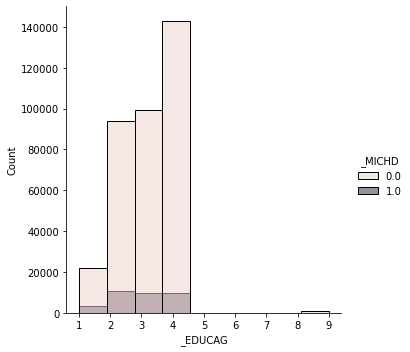

In [52]:
sns.displot(x = df['_EDUCAG'], hue = '_MICHD', data = df,   bins = 9)

##### Better education (the higher the score) has lower proportion of cases. Delete missing lines ('9').

In [53]:
df = df.drop(df[df['_EDUCAG'] == 9].index)

#### '_CHLDCNT'
##### Number of Children in Household.

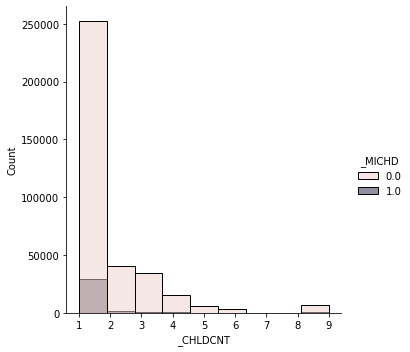

In [54]:
sns.displot(x = df['_CHLDCNT'], hue = '_MICHD', data = df,  bins = 9)

In [55]:
df.groupby(['_CHLDCNT'])['_CHLDCNT'].count()

_CHLDCNT
1.0    284676
2.0     42864
3.0     35885
4.0     15690
5.0      5826
6.0      3109
9.0      7153
Name: _CHLDCNT, dtype: int64

'9' - missing values, replace them with the average value.

In [56]:
df=df.replace({'_CHLDCNT':{9:df['_CHLDCNT'].mean()}})

#### '_SMOKER3'
##### Four-level smoker status.

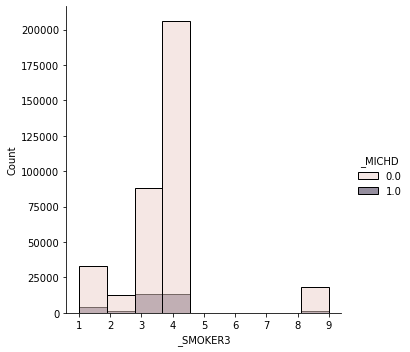

In [57]:
sns.displot(x = df['_SMOKER3'], hue = '_MICHD', data = df,  bins = 9)

In [58]:
df.groupby(['_SMOKER3'])['_SMOKER3'].count()

_SMOKER3
1.0     37613
2.0     14103
3.0    102595
4.0    221040
9.0     19852
Name: _SMOKER3, dtype: int64

##### '9' - missing values, replace them with the average value.

In [59]:
df=df.replace({'_SMOKER3':{9:df['_SMOKER3'].mean()}})

#### '_URBSTAT'
##### Urban status.

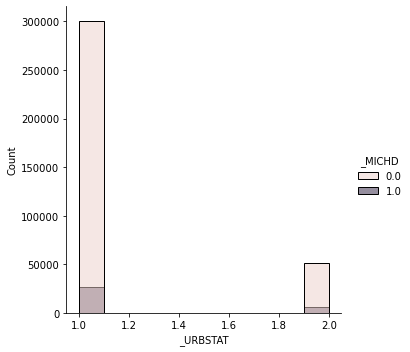

In [60]:
sns.displot(x = df['_URBSTAT'], hue = '_MICHD', data = df,  bins = 10)

##### Make '1' and '0' values.

In [61]:
df = df.replace({'_URBSTAT':{2:0}})

##### Replace NaN with '0'.

In [62]:
df['_URBSTAT'] = df['_URBSTAT'].fillna(0)   

#### '_IMPRACE'
##### Imputed race/ethnicity.

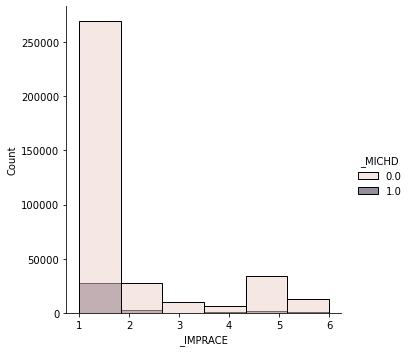

In [63]:
sns.displot(x = df['_IMPRACE'], hue = '_MICHD', data = df,  bins = 6)

In [64]:
df.groupby(['_IMPRACE'])['_IMPRACE'].count()

_IMPRACE
1.0    299025
2.0     29784
3.0     10072
4.0      6794
5.0     35781
6.0     13747
Name: _IMPRACE, dtype: int64

##### '1' White, '2' Black, '3' Asian, '4' American Native, '5' Hispanic, '6' Other race. Make One Hot Encoding.

In [65]:
df = df.replace({'_IMPRACE': {1:'WHITE', 2:'BLACK', 3:'ASIAN', 4:'AMRNTV', 5:'HISPAN', 6:'OTHRRACE'}})
dummy_race = pd.get_dummies(df['_IMPRACE'])
df = pd.merge(left = df, right = dummy_race, left_index = True, right_index = True)
df = df.drop(['_IMPRACE'], axis = 1)

#### '_RFBING5'
##### Binge drinkers.

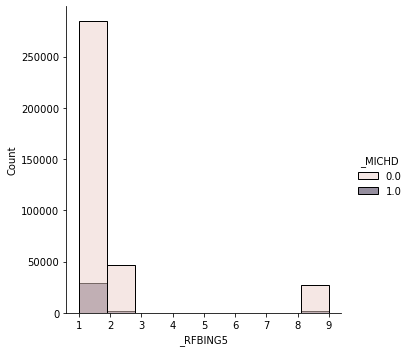

In [66]:
sns.displot(x = df['_RFBING5'], hue = '_MICHD', data = df,  bins = 9)

In [67]:
df.groupby(['_RFBING5'])['_RFBING5'].count()

_RFBING5
1.0    316746
2.0     48831
9.0     29626
Name: _RFBING5, dtype: int64

##### Too many missing values - 29625 (encoded '9'), the distribution is uniform, remove this feature.

In [68]:
df = df.drop(['_RFBING5'], axis=1)

### Check for NaN

In [69]:
df.isnull().sum()

_SEX            0
_AGE80          0
_TOTINDA        0
GENHLTH         5
CVDSTRK3        0
DIABETE4        0
LASTDEN4        0
_EDUCAG         0
_CHLDCNT        0
_SMOKER3        0
_URBSTAT        0
_MICHD       3255
BMI_LOG         0
SLEEP_LOG       0
DIVRSD          0
MARRD           0
NEVMRRD         0
SEPRTD          0
UNMCOUPL        0
WIDWD           0
AMRNTV          0
ASIAN           0
BLACK           0
HISPAN          0
OTHRRACE        0
WHITE           0
dtype: int64

##### Delete the remaining lines with NaN, including the target feature.

In [70]:
df = df.dropna()

In [72]:
df.to_csv('heart_des_data.csv', header = True, index = False) 